In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
df_2 = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
df_2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
df_meg = pd.merge(df, df_2, how='inner', left_on='movie', right_on='primary_title')
df_meg.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


In [5]:
for col in df_meg.columns:
    pct_missing = np.mean(df_meg[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
release_date - 0.0%
movie - 0.0%
production_budget - 0.0%
domestic_gross - 0.0%
worldwide_gross - 0.0%
tconst - 0.0%
primary_title - 0.0%
original_title - 0.0%
start_year - 0.0%
runtime_minutes - 13.0%
genres - 2.0%


In [6]:
cols_to_drop = ['runtime_minutes','start_year','original_title','id' ,'production_budget', 'release_date','tconst','primary_title']
df_mod_2 = df_meg.drop(cols_to_drop, axis=1)
df_mod_2.head()

,movie,domestic_gross,worldwide_gross,genres
0,Avatar,"$760,507,625","$2,776,345,279",Horror
1,Pirates of the Caribbean: On Stranger Tides,"$241,063,875","$1,045,663,875","Action,Adventure,Fantasy"
2,Dark Phoenix,"$42,762,350","$149,762,350","Action,Adventure,Sci-Fi"
3,Avengers: Age of Ultron,"$459,005,868","$1,403,013,963","Action,Adventure,Sci-Fi"
4,Avengers: Infinity War,"$678,815,482","$2,048,134,200","Action,Adventure,Sci-Fi"


In [7]:
df_mod_2["genres"] = df_mod_2["genres"].apply(lambda x: x.split(",") if type(x) == str else x)
df_mod_2["domestic_gross"] = df["domestic_gross"].str.replace(",","").str.replace("$","").astype(int)
df_mod_2["worldwide_gross"] = df["worldwide_gross"].str.replace(",","").str.replace("$","").astype(int)
df_mod_2.head()

,movie,domestic_gross,worldwide_gross,genres
0,Avatar,760507625,2776345279,[Horror]
1,Pirates of the Caribbean: On Stranger Tides,241063875,1045663875,"[Action, Adventure, Fantasy]"
2,Dark Phoenix,42762350,149762350,"[Action, Adventure, Sci-Fi]"
3,Avengers: Age of Ultron,459005868,1403013963,"[Action, Adventure, Sci-Fi]"
4,Avengers: Infinity War,620181382,1316721747,"[Action, Adventure, Sci-Fi]"


In [8]:
df_explode = df_mod_2.explode('genres')
df_explode

,movie,domestic_gross,worldwide_gross,genres
0,Avatar,760507625,2776345279,Horror
1,Pirates of the Caribbean: On Stranger Tides,241063875,1045663875,Action
1,Pirates of the Caribbean: On Stranger Tides,241063875,1045663875,Adventure
1,Pirates of the Caribbean: On Stranger Tides,241063875,1045663875,Fantasy
2,Dark Phoenix,42762350,149762350,Action
...,...,...,...,...
3813,Red 11,184255,184255,Sci-Fi
3813,Red 11,184255,184255,Thriller
3814,A Plague So Pleasant,148826,148826,Drama
3814,A Plague So Pleasant,148826,148826,Horror


In [9]:
df_explode.replace(0, np.nan, inplace=True)
df_explode[df_explode.isna().any(axis=1)]
df_explode = df_explode.dropna()

In [10]:
print(df.isnull().sum())

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


In [11]:
df_explode

,movie,domestic_gross,worldwide_gross,genres
0,Avatar,760507625.0,2.776345e+09,Horror
1,Pirates of the Caribbean: On Stranger Tides,241063875.0,1.045664e+09,Action
1,Pirates of the Caribbean: On Stranger Tides,241063875.0,1.045664e+09,Adventure
1,Pirates of the Caribbean: On Stranger Tides,241063875.0,1.045664e+09,Fantasy
2,Dark Phoenix,42762350.0,1.497624e+08,Action
...,...,...,...,...
3813,Red 11,184255.0,1.842550e+05,Sci-Fi
3813,Red 11,184255.0,1.842550e+05,Thriller
3814,A Plague So Pleasant,148826.0,1.488260e+05,Drama
3814,A Plague So Pleasant,148826.0,1.488260e+05,Horror


In [12]:
df_explode.groupby('genres').mean()

,domestic_gross,worldwide_gross
genres,,
Action,8.787681e+07,2.162725e+08
Adventure,1.202802e+08,3.056177e+08
Animation,1.152532e+08,2.772697e+08
Biography,5.627312e+07,1.123711e+08
Comedy,5.704056e+07,1.230266e+08
Crime,4.885757e+07,1.032166e+08
Documentary,5.893216e+07,1.311174e+08
Drama,5.145744e+07,1.063961e+08
Family,7.881595e+07,1.811097e+08


In [13]:
df_explode= df_explode.sort_values("worldwide_gross", ascending=False).set_index('movie')
df_top_50 = df_explode

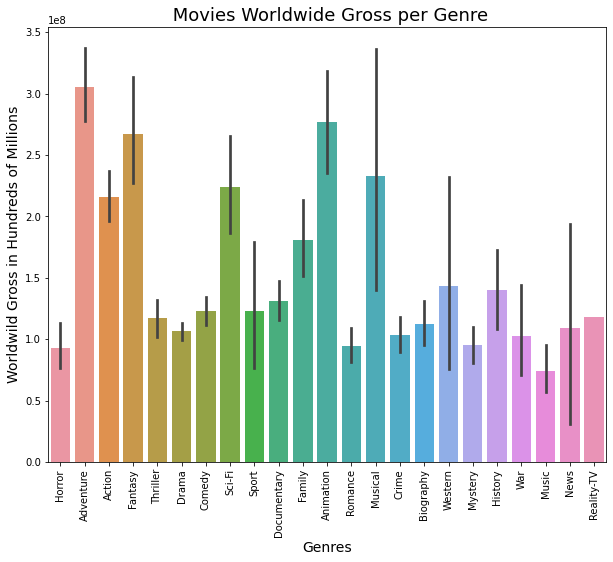

In [14]:
plt.figure(figsize=(10, 8))
sns.barplot(x='genres', 
            y='worldwide_gross', 
            data=df_top_50,)
plt.ylabel("Worldwild Gross in Hundreds of Millions", size=14)
plt.xlabel("Genres", size=14)
plt.title(" Movies Worldwide Gross per Genre", size=18)
plt.tick_params(axis='x', labelrotation=90)
plt.savefig("grouped_barplot_Seaborn_barplot_Python.png")
#plt.legend()